In [1]:
from pathlib import Path
import os

from imutils.paths import list_files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa

In [2]:
SEP       = os.path.sep
ROOT_PATH = SEP.join(os.getcwd().split(SEP)[:-3])
DATA_PATH = f'{ROOT_PATH}/Datasets/MusicNet'

In [3]:
df        = pd.read_csv(f'{DATA_PATH}/musicnet_metadata.csv')
wav_paths = sorted(list_files(f'{DATA_PATH}/musicnet/musicnet', validExts = '.wav'))
df.sample(5).T

,323,93,86,278,155
id,2628,2157,2148,2531,2288
composer,Beethoven,Brahms,Brahms,Beethoven,Bach
composition,Violin Sonata No 10 in G major,String Sextet No 1 in B-flat major,Piano Quartet No 1 in G minor,Piano Sonata No 20 in C minor,Violin Partita No 1 in B minor
movement,3. Scherzo: Allegro - Trio,4. Rondo: Poco Allegretto e grazioso,1. Allegro,2. Arietta: Adagio,2. Corrente
ensemble,Accompanied Violin,String Sextet,Piano Quartet,Solo Piano,Solo Violin
source,Irrera Brothers,Carl Banner,Roxana Pavel Goldstein,Paul Pitman,John Garner
transcriber,suzumedia,harfesoft.de,harfesoft.de,piano-midi.de,suzumidi
catalog_name,OP96,OP18,OP25,OP111,BWV1002
seconds,124,661,822,992,191


In [4]:
df.id      = df.id.astype(str)
composers  = set(df.composer)
ids        = [Path(path).stem for path in wav_paths]

composers

{'Bach',
 'Beethoven',
 'Brahms',
 'Cambini',
 'Dvorak',
 'Faure',
 'Haydn',
 'Mozart',
 'Ravel',
 'Schubert'}

In [5]:
df_         = pd.DataFrame()
df_['id']   = ids
df_['path'] = wav_paths
df_         = df_.set_index('id').join(df.set_index('id'), how = 'inner')
df_         = df_[['path', 'composer', 'composition']]
df_.sample(3).T

id,2533,2677,1859
path,/home/jovyan/dove/projects/BACKUP/misc/Dataset...,/home/jovyan/dove/projects/BACKUP/misc/Dataset...,/home/jovyan/dove/projects/BACKUP/misc/Dataset...
composer,Beethoven,Beethoven,Mozart
composition,Piano Sonata No 20 in C minor,Piano Sonata No 9 in E major,String Quartet No 18 in A major


In [6]:
def draw_sample_hist(df, composer, n_samples = 3):
    
    h, w       = 5 * n_samples, 5 * n_samples
    composed   = df[df.composer == composer]
    random_idx = np.random.randint(0, len(composed), n_samples)
    _, axes    = plt.subplots(n_samples, 2, figsize=(h, w))
    plt.suptitle(composer)
    
    for idx, ax in zip(random_idx, axes):
        
        ## librosa library를 이용한 wav 데이터 로딩
        wav, hz     = librosa.core.load(composed.path[idx])
        length      = wav.shape[0] / float(hz)
        
        id_         = composed.index[idx]
        composer    = composed.composer[idx]
        composition = composed.composition[idx]
        
        print(f'id : {id_} wav sampling rate : {hz}(Hz) length : {length:.3f}(sec)')
        display_wave(wav, ax[0])
        display_fft(wav , hz, ax[1])
        
        stft        = librosa.stft(wav)
        x_db        = librosa.amplitude_to_db(abs(stft))
        
        plt.figure(figsize = (14, 5))
        librosa.display.specshow(x_db, sr = hz, x_axis = 'time', y_axis = 'hz')
        plt.colorbar()


def display_wave(wav, ax):
    
    ax.plot(wav, alpha = 0.4)
    ax.set_ylim(-1, 1)
    ax.set_title('waveform')
    ax.set_xlabel('time (s)')
    ax.set_ylabel('Amplitude (db)')
    
    
def display_fft(wav, hz, ax):
    
    fft        = np.fft.fft(wav)
    spectrum   = np.abs(fft)
    interval   = np.linspace(0, hz, len(spectrum))
    
    l_spectrum = spectrum[ :len(spectrum) // 2]
    l_interval = interval[ :len(spectrum) // 2]
    
    ax.plot(l_interval, l_spectrum, alpha = 0.4)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Magnitude')
    ax.set_title('Power spectrum')
    

def padding(array, xx, yy):
    
    h, w = array.shape[:2]
    a    = max((xx - h) // 2, 0)
    a_   = max(0, xx - a - h)
    
    b    = max(0, (yy - w) // 2)
    b_   = max(yy - b - w, 0)
    
    return np.pad(array, pad_width = ((a, a_), (b, b_)), mode = 'constant')

id : 2501 wav sampling rate : 22050(Hz) length : 367.177(sec)
id : 2614 wav sampling rate : 22050(Hz) length : 635.167(sec)
id : 2628 wav sampling rate : 22050(Hz) length : 124.682(sec)


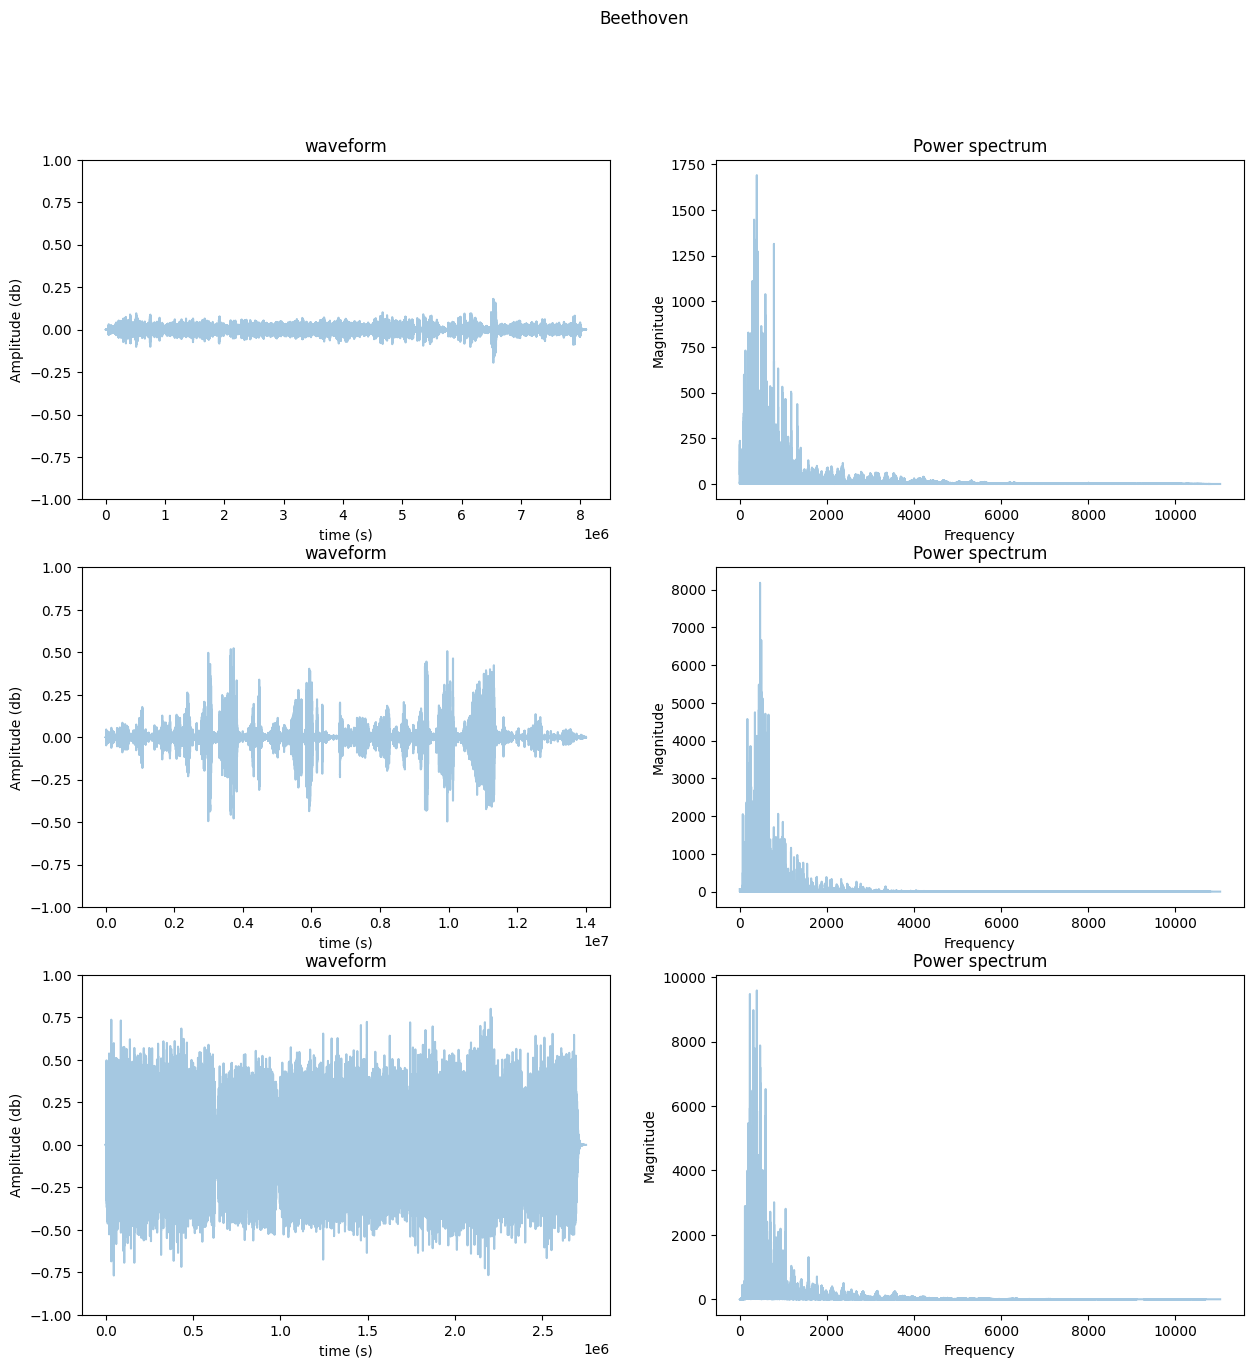

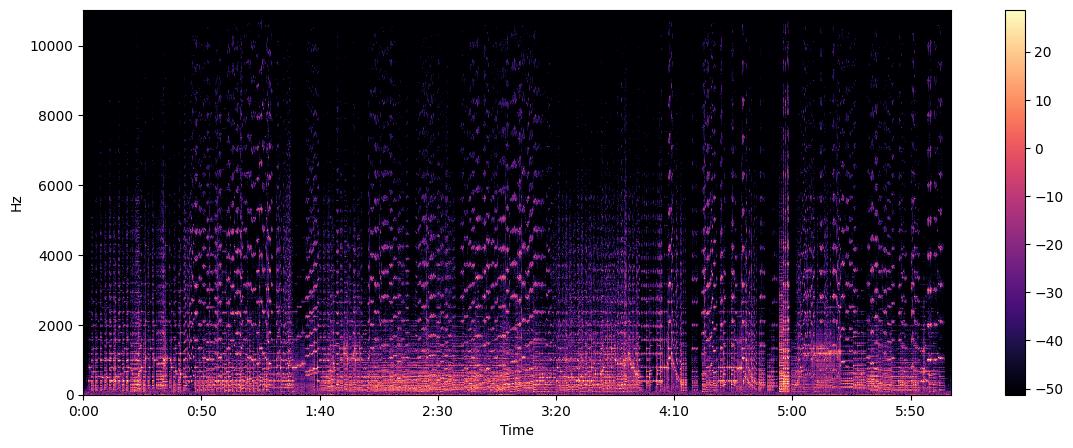

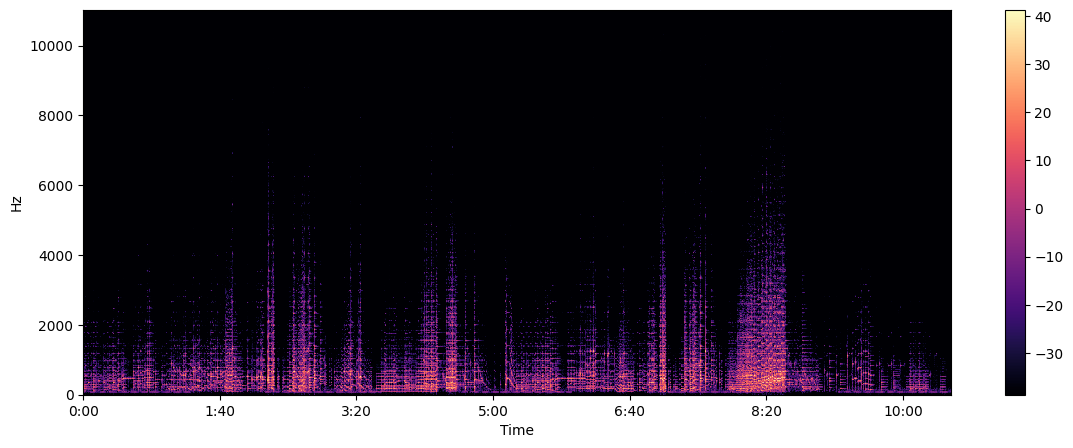

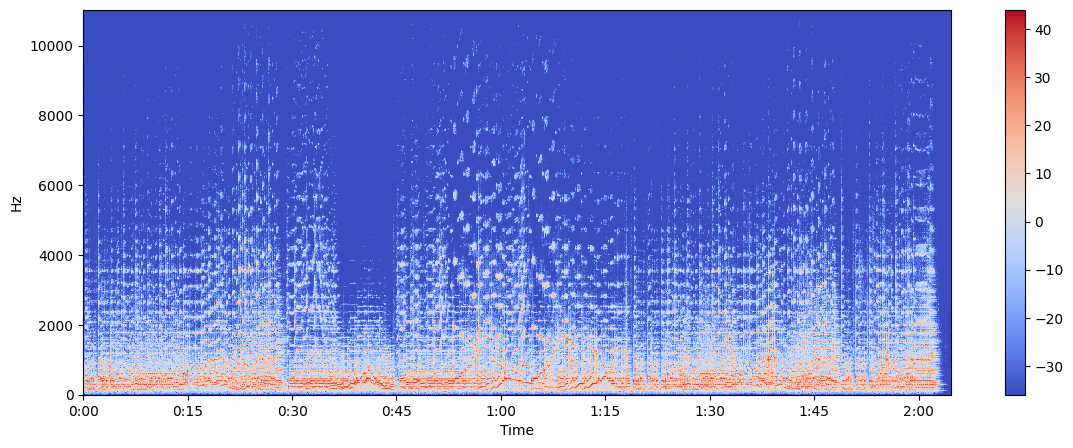

In [7]:
draw_sample_hist(df_, 'Beethoven')

id : 1733 wav sampling rate : 22050(Hz) length : 546.011(sec)
id : 1742 wav sampling rate : 22050(Hz) length : 924.526(sec)
id : 1734 wav sampling rate : 22050(Hz) length : 325.616(sec)


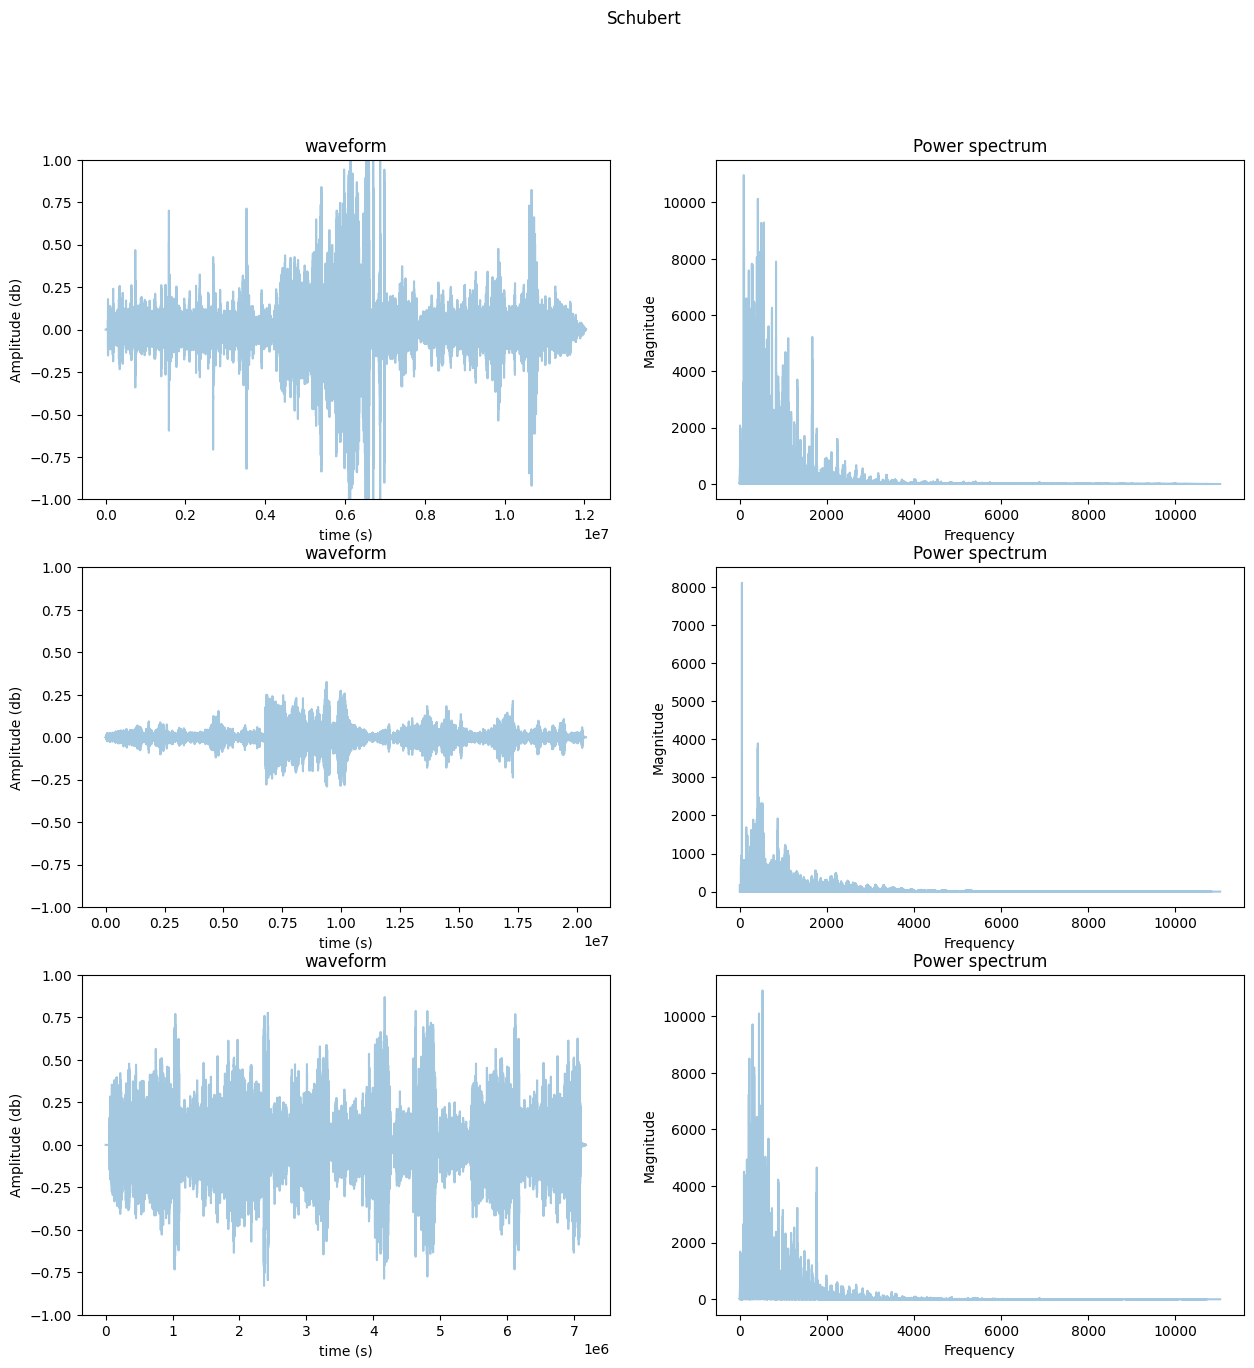

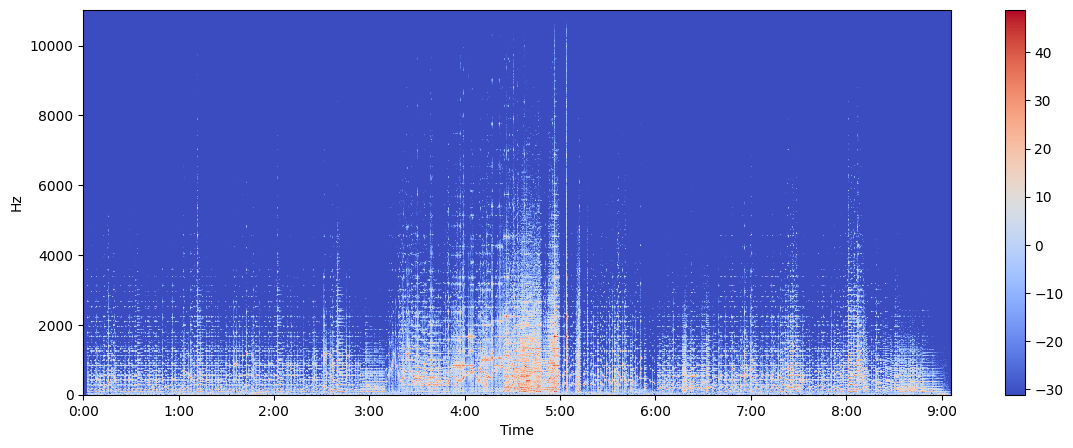

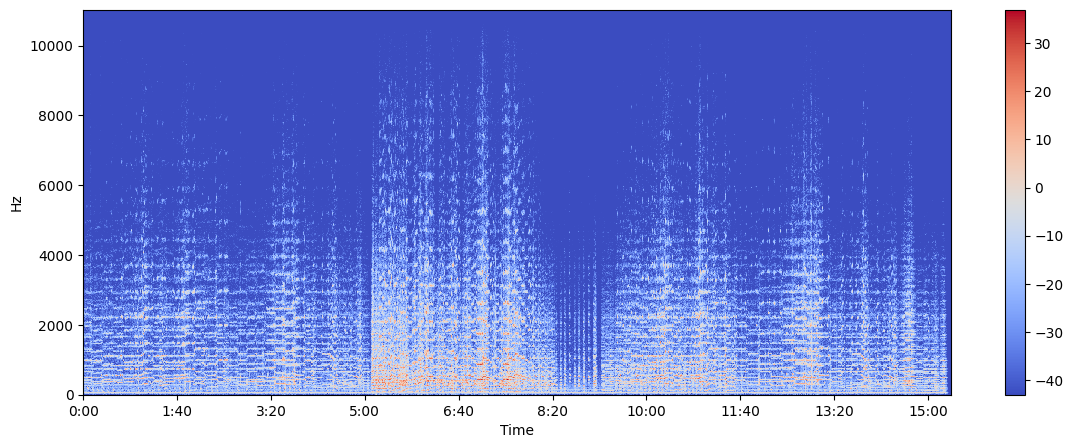

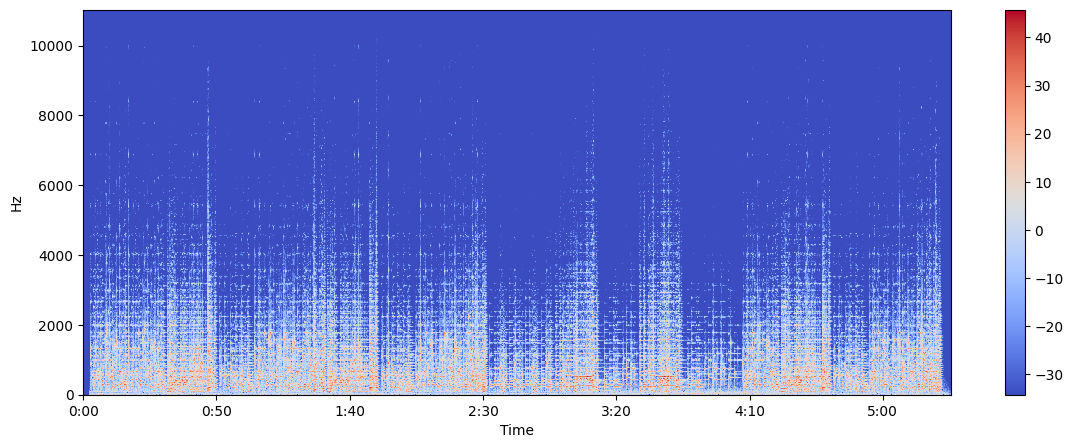

In [8]:
draw_sample_hist(df_, 'Schubert')

In [9]:
composed   = df_[df_.composer == 'Beethoven'].path[0]
wav,  sr   = librosa.core.load(composed)

In [10]:
stft       = librosa.stft(wav)
stft       = librosa.amplitude_to_db(np.abs(stft))
stft

array([[-30.03704 , -30.03704 , -30.03704 , ..., -30.03704 , -23.212431,
        -18.124372],
       [-30.03704 , -26.838127, -30.03704 , ..., -30.03704 , -23.67868 ,
        -17.893904],
       [-30.03704 , -20.665081, -18.366364, ..., -23.975561, -24.943525,
        -16.088669],
       ...,
       [-30.03704 , -30.03704 , -30.03704 , ..., -30.03704 , -30.03704 ,
        -30.03704 ],
       [-30.03704 , -30.03704 , -30.03704 , ..., -30.03704 , -30.03704 ,
        -30.03704 ],
       [-30.03704 , -30.03704 , -30.03704 , ..., -30.03704 , -30.03704 ,
        -30.03704 ]], dtype=float32)